In [1]:
from scipy import special
import numpy as np

def drumhead_height(n, k, distance, angle, offset=0):
    kth_zero = special.jn_zeros(n, k)[-1]
    E = kth_zero ** 2
    jn = special.jn(n, distance*kth_zero)
    eigf = [np.cos(n*angle) * jn]
    if n > 0:
        eigf.append(np.sin(n*angle) * jn)
    return E, eigf


theta = np.r_[0:2*np.pi:60j][:-1]
radius = np.r_[0:1:40j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])

In [2]:
R, T = np.meshgrid(radius, theta)

eigs = []
for n in range(20):
    for k in range(1, 20):
        eigs.append(drumhead_height(n, k, R, T, 0.5))
eigs.sort()
eigs = eigs[:20]

In [3]:
import json
with open("drum.json", 'w') as f:
    json.dump({
        "x": list(map(list, x)),
        "y": list(map(list, y)),
        "eigs": [{
            'E': E,
            'zs': [list(map(list, f)) for f in fs]
        } for E, fs in eigs[:6]]
    }, f)

for E, fs in eigs:
    print(E, len(fs))

5.783185962946785 1
14.681970642123895 2
26.374616427163392 2
30.471262343662087 1
40.70646581820033 2
49.2184563216946 2
57.58294090329111 2
70.84999891909585 2
74.88700679069518 1
76.9389283336474 2
95.27757254403716 2
98.72627247724938 2
103.49945389513657 2
122.42779606492816 2
122.90760020361625 2
135.02070886597045 2
139.04028442645983 1
149.4528808634265 2
152.2411535417489 2
169.39544982609945 2


In [12]:
a = np.array([[1, 2],[3,4]])
a

array([[1, 2],
       [3, 4]])

[array([[ 1.00000000e+00,  9.99049669e-01,  9.96201387e-01, ...,
          6.55570735e-02,  3.24087873e-02, -1.02392318e-16],
        [ 1.00000000e+00,  9.99049669e-01,  9.96201387e-01, ...,
          6.55570735e-02,  3.24087873e-02, -1.02392318e-16],
        [ 1.00000000e+00,  9.99049669e-01,  9.96201387e-01, ...,
          6.55570735e-02,  3.24087873e-02, -1.02392318e-16],
        ...,
        [ 1.00000000e+00,  9.99049669e-01,  9.96201387e-01, ...,
          6.55570735e-02,  3.24087873e-02, -1.02392318e-16],
        [ 1.00000000e+00,  9.99049669e-01,  9.96201387e-01, ...,
          6.55570735e-02,  3.24087873e-02, -1.02392318e-16],
        [ 1.00000000e+00,  9.99049669e-01,  9.96201387e-01, ...,
          6.55570735e-02,  3.24087873e-02, -1.02392318e-16]])]

In [42]:
x, y

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02564103, 0.02549576, 0.02506163, ..., 0.02434353, 0.02506163,
         0.02549576],
        [0.05128205, 0.05099153, 0.05012325, ..., 0.04868706, 0.05012325,
         0.05099153],
        ...,
        [0.94871795, 0.94334327, 0.92728014, ..., 0.90071055, 0.92728014,
         0.94334327],
        [0.97435897, 0.96883904, 0.95234176, ..., 0.92505408, 0.95234176,
         0.96883904],
        [1.        , 0.9943348 , 0.97740339, ..., 0.94939761, 0.97740339,
         0.9943348 ]]),
 array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
         -0.        , -0.        ],
        [ 0.        ,  0.00272547,  0.00542007, ..., -0.00805325,
         -0.00542007, -0.00272547],
        [ 0.        ,  0.00545095,  0.01084013, ..., -0.0161065 ,
         -0.01084013, -0.00545095],
        ...,
        [ 0.        ,  0.10084254,  0.20054249, ..., -0.29797021,
         -0.20054249, -0

In [50]:
import json
from scipy.interpolate import CloughTocher2DInterpolator

def interpolate_strand(t, z, xdirection=True):
    f = CloughTocher2DInterpolator(
        list(zip(x.flatten(), y.flatten())) if xdirection else list(zip(y.flatten(), x.flatten())),
        z.T.flatten())
    
    h = 1e-3
    b = np.sqrt(1 - t*t) - 1e-2
    ts = np.linspace(-b, b, round(14*b))
    
    mid = f(t, ts)
    left = f(t, ts[1:] - h)
    right = f(t, ts[:-1] + h)
    return {
        't': t,
        'ts': list(ts),
        'strand': list(zip(list(mid), [(right[0] - mid[0])/h, *(right[1:] - left[:-1])/(2*h), (mid[-1] - left[-1])/h]))
    }

ts = np.linspace(-1, 1, 8)[1:-1]

with open("drum_strands.json", 'w') as f:
    json.dump({
        "eigs": [{
            'E': E,
            'zs': [{
                'x': [interpolate_strand(t, z, True) for t in ts],
                'y': [interpolate_strand(t, z, False) for t in ts]
            } for z in zs]
        } for E, zs in eigs[:6]]
    }, f)

In [14]:
i = 0
for E, fs in eigs:
    r = ' = '.join(f'E_{{{i+j}}}' for j in range(len(fs)))
    r += f' \\approx {E:.2f}'
    print(r)
    i += len(fs)

E_{0} \approx 5.78
E_{1} = E_{2} \approx 14.68
E_{3} = E_{4} \approx 26.37
E_{5} \approx 30.47
E_{6} = E_{7} \approx 40.71
E_{8} = E_{9} \approx 49.22
E_{10} = E_{11} \approx 57.58
E_{12} = E_{13} \approx 70.85
E_{14} \approx 74.89
E_{15} = E_{16} \approx 76.94
E_{17} = E_{18} \approx 95.28
E_{19} = E_{20} \approx 98.73
E_{21} = E_{22} \approx 103.50
E_{23} = E_{24} \approx 122.43
E_{25} = E_{26} \approx 122.91
E_{27} = E_{28} \approx 135.02
E_{29} \approx 139.04
E_{30} = E_{31} \approx 149.45
E_{32} = E_{33} \approx 152.24
E_{34} = E_{35} \approx 169.40


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (40, 60) and arg 2 with shape (50, 50).

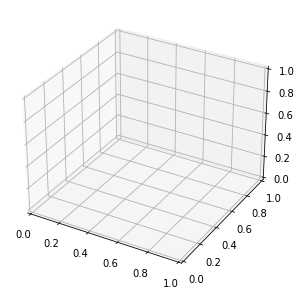

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

In [44]:
theta[-1]

6.283185307179586